In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from msresist.pre_processing import preprocessing
import numpy as np
import pandas as pd 

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [25]:
X = preprocessing(AXL_Das_DR=True, Vfilter=True, log2T=True, mc_row=False, FCtoUT=False)
for i in range(X.shape[0]):
   X.iloc[i, 6:11] -= X.iloc[i, 6]
   X.iloc[i, 11:] -= X.iloc[i, 11]

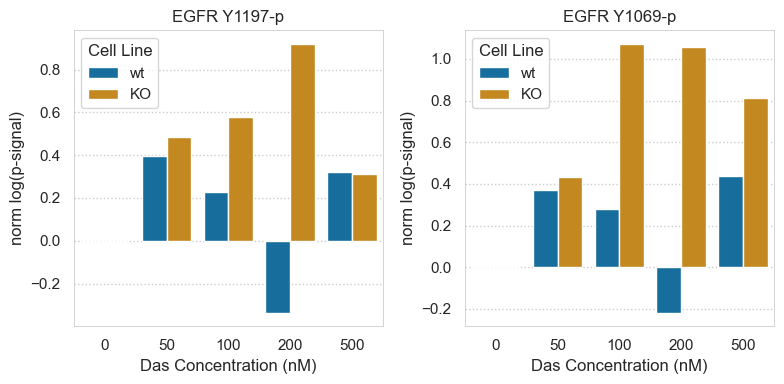

In [28]:
egfr = X[X["Gene"] == "EGFR"].drop(["Protein", "Sequence", "BioReps", "r2_Std"], axis=1)
egfr = pd.melt(egfr, ["Gene", "Position"], egfr.columns[2:], "Conditions", "norm log(p-signal)")
egfr.insert(1, "Cell Line", [s.split(" ")[0] for s in egfr["Conditions"]])
egfr.insert(2, "Das Concentration (nM)", [s.split(" ")[1] for s in egfr["Conditions"]])

_, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(egfr[egfr["Position"] == "Y1197-p"], x="Das Concentration (nM)", hue="Cell Line", y="norm log(p-signal)", ax=ax[0]).set_title("EGFR Y1197-p")
sns.barplot(egfr[egfr["Position"] == "Y1069-p"], x="Das Concentration (nM)", hue="Cell Line", y="norm log(p-signal)", ax=ax[1]).set_title("EGFR Y1069-p")
plt.tight_layout()

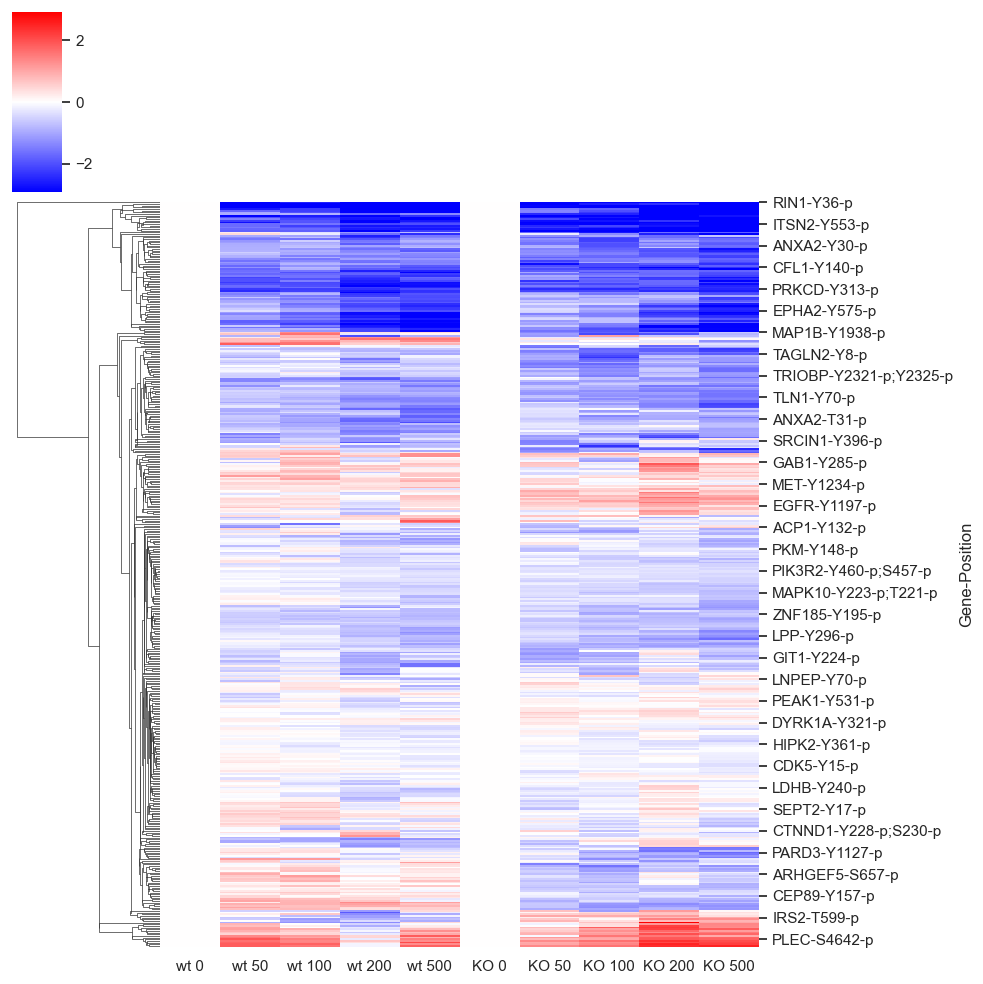

In [27]:
data = X.set_index(["Gene", "Position"]).select_dtypes(include=["float64"])
lim = np.max(abs(data.values)) * 0.5
g = sns.clustermap(data, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(10, 10), xticklabels=True, col_cluster=False)
data_dr = X.iloc[g.dendrogram_row.reordered_ind[:55], :].set_index(["Gene", "Position"]).select_dtypes(include=["float64"])

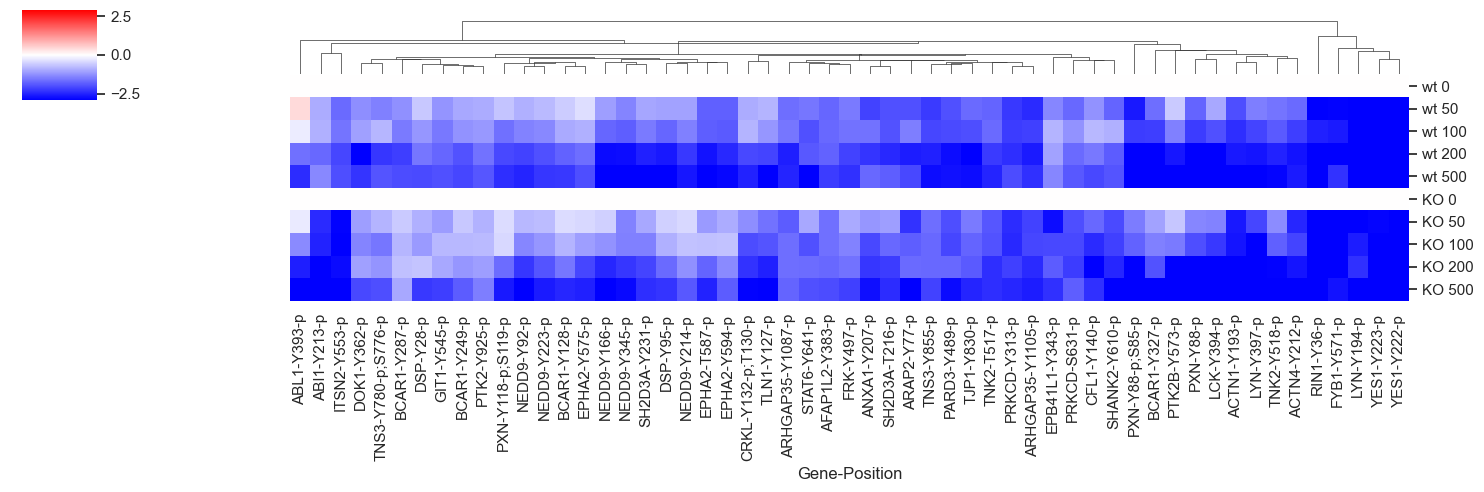

In [11]:
sns.clustermap(data_dr.T, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(15, 5), xticklabels=True, col_cluster=True, row_cluster=False)

In [18]:
fc = preprocessing(AXL_Das_DR=True, Vfilter=True, FCtoUT=True, log2T=False, mc_row=False).set_index(["Gene", "Position"])

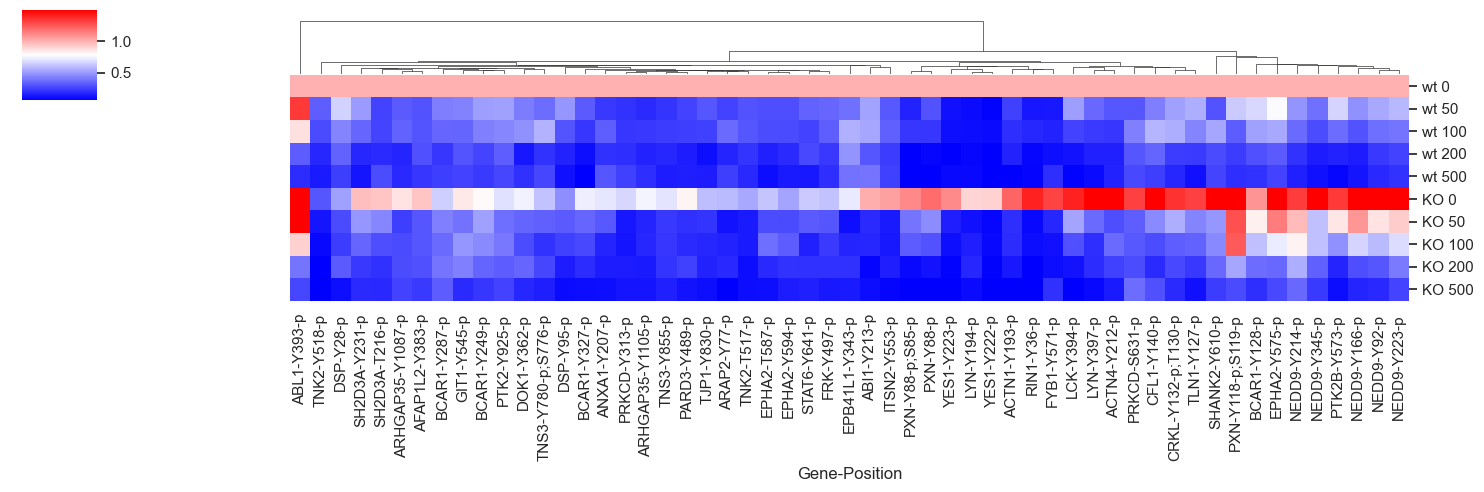

In [26]:
fc_dr = fc.loc[data_dr.index].iloc[:, 4:]
lim = np.max(abs(fc_dr.values)) * 0.5
sns.clustermap(fc_dr.T, method="centroid", cmap="bwr", robust=True, figsize=(15, 5), xticklabels=True, col_cluster=True, row_cluster=False)